In [1]:
import sys
lib = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities\droplet_dataset'
lib2 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\utilities'
lib3 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy\data_analysis'
lib4 = r'D:\Technion studies\Keren Laboratory\python_playground\classifying-response-to-immunotherapy'
sys.path.append(lib)
sys.path.append(lib2)
sys.path.append(lib3)
sys.path.append(lib4)

import os
from os.path import join
import sklearn
from droplet_dataset import *
from utilities import *
from matplotlib import pyplot
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import random
from scipy.stats import pearsonr
from matplotlib.pyplot import figure
from sklearn.manifold import TSNE
sklearn.__version__
%matplotlib notebook

In [2]:
def TSNE_plot(cells_embedded, TSNE_clusters):
    X = cells_embedded[0]
    Y = cells_embedded[1]

    # plt.plot(X, Y, 'ro')

    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple',  'lime', 'lavender', 'darkred', 'olive']
    for cluster, c in zip(np.unique(TSNE_clusters), colors):
        Xi = [X[i] for i in range(len(TSNE_clusters)) if TSNE_clusters[i] == cluster]
        Yi = [Y[i] for i in range(len(TSNE_clusters)) if TSNE_clusters[i] == cluster]
        plt.plot(Xi, Yi, 'ro', color=c, label=cluster)
    # if centroids:
    #     for centroid in centroids:
    #         plt.plot(centroid[0], centroid[1], 'ro', color='y')
    # plt.plot([1, 2], [1, 4], 'ro')
    # plt.plot([3, 4], [9, 16], 'ro', color='green')
    # plt.title(title)
    plt.legend()
    plt.show()

In [3]:
PICKLE_PATH = r'D:\Technion studies\Keren Laboratory\Data\smart_seq\SmartSeq_RNAseq_DATA.p'
cells, gene_names, patients_information = extract_smart_seq_data_from_pickle(PICKLE_PATH)

In [4]:
sample = cells[:, 6<np.var(cells, axis=0)]

In [5]:
keren_clusters = [p['general 11 cluster'] for p in patients_information]

interesting_clusters = [3,5,9, 6]
bool_indices = [keren_clusters[ii] in interesting_clusters for ii in range(len(keren_clusters))]

clusters = np.array(keren_clusters)[bool_indices]
sub_cells = sample[bool_indices, :]
sub_cells.shape

(7434, 4141)

#  Draw a sample

In [6]:
number_of_cells = 600
samples_indices = random.sample(range(len(sub_cells)), number_of_cells)
TNSE_cells = sub_cells[samples_indices]
TSNE_clusters = clusters[samples_indices]

# TSNE with default parameters

(2, 600)


<IPython.core.display.Javascript object>


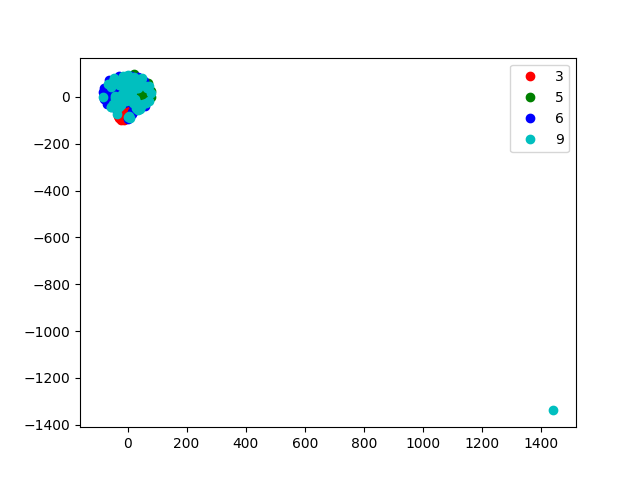

In [66]:
cells_embedded = TSNE(n_components=2, random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

# Perplexity

(2, 600)


<IPython.core.display.Javascript object>


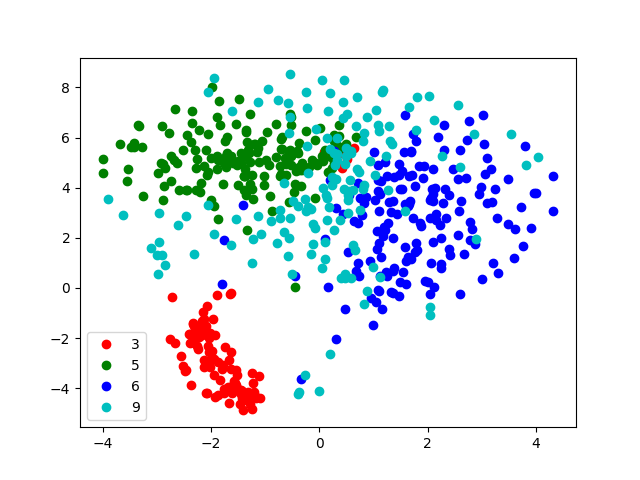

In [62]:
cells_embedded = TSNE(n_components=2, perplexity=60.0, random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

(2, 600)


<IPython.core.display.Javascript object>


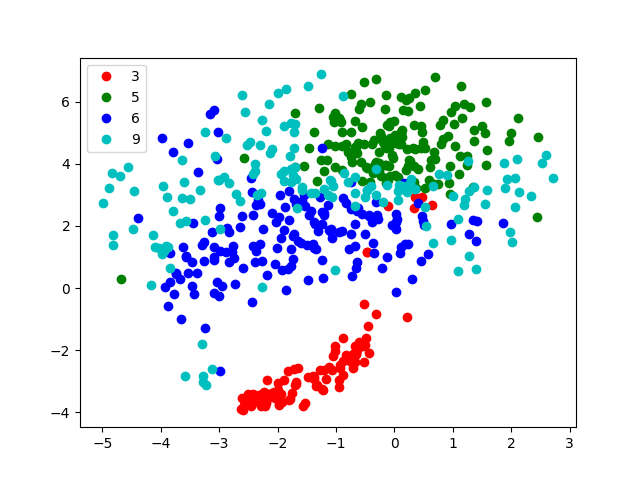

In [63]:
cells_embedded = TSNE(n_components=2, perplexity=90.0, random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

(2, 600)


<IPython.core.display.Javascript object>


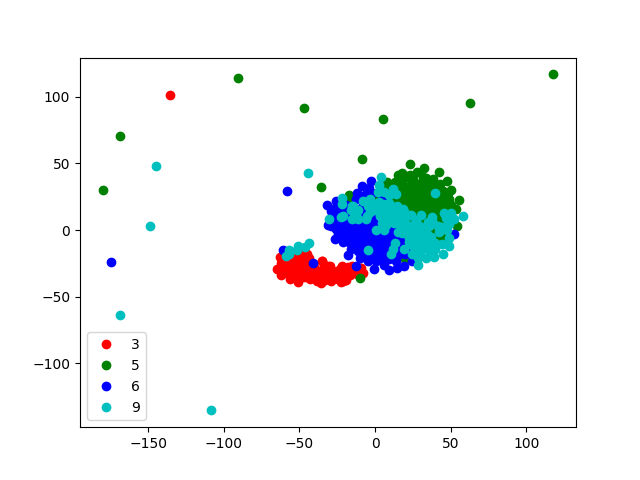

In [64]:
cells_embedded = TSNE(n_components=2, perplexity=10.0, random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

# Initialization

(2, 600)


<IPython.core.display.Javascript object>


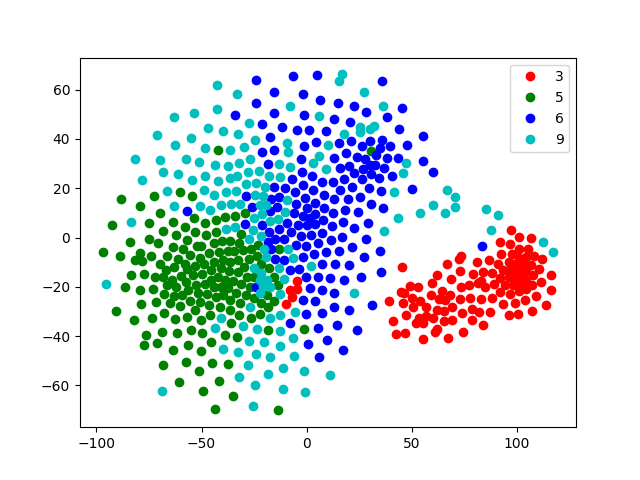

In [65]:
cells_embedded = TSNE(n_components=2, init="pca", random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

(2, 600)


<IPython.core.display.Javascript object>


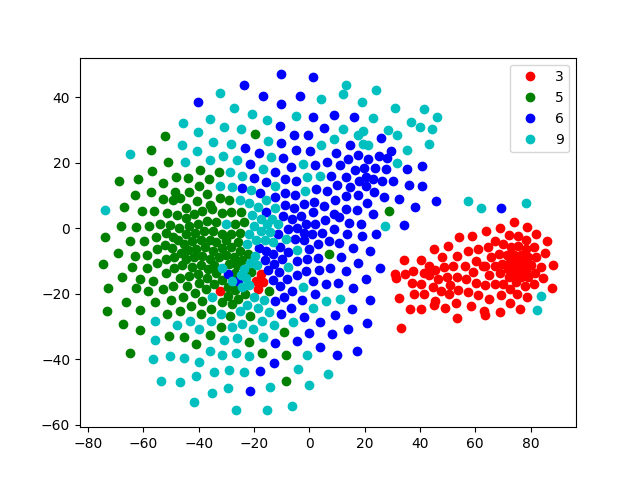

In [67]:
cells_embedded = TSNE(n_components=2, init="pca", perplexity=60.0, random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

(2, 600)


<IPython.core.display.Javascript object>


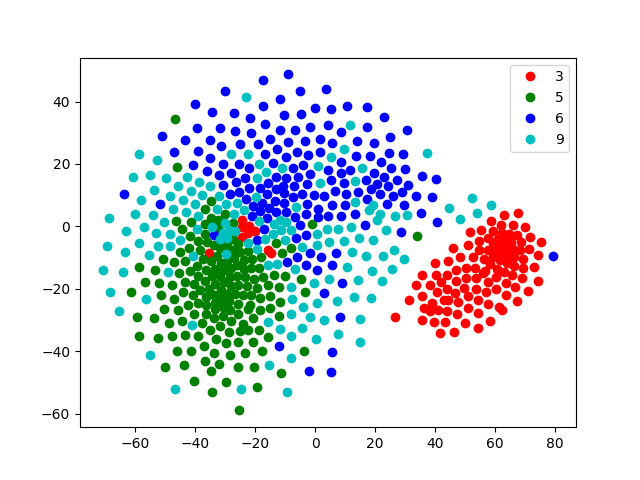

In [68]:
cells_embedded = TSNE(n_components=2, init="pca", perplexity=90.0, random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

# All together

(2, 600)


<IPython.core.display.Javascript object>


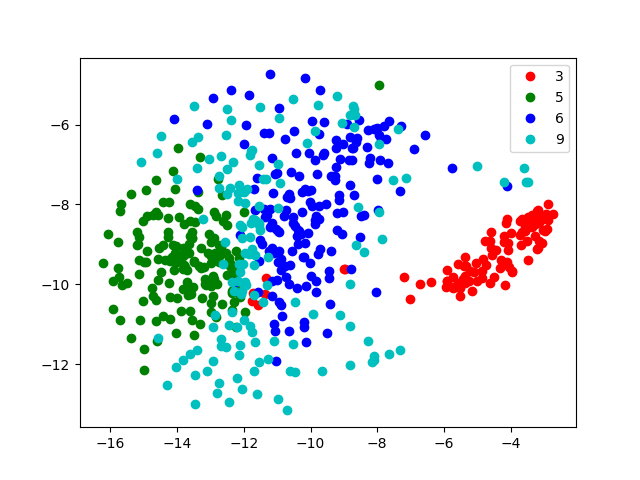

In [78]:
cells_embedded = TSNE(n_components=2, init="pca", learning_rate=100.0, n_iter=2000, perplexity=60.0, random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

(2, 600)


<IPython.core.display.Javascript object>


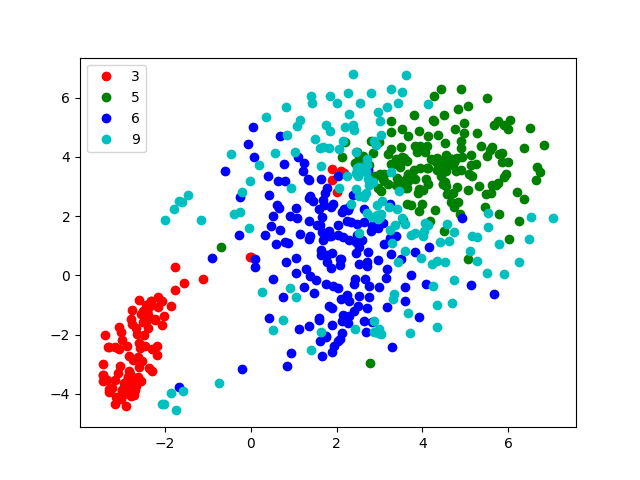

In [77]:
cells_embedded = TSNE(n_components=2, learning_rate=100.0, n_iter=2000, perplexity=60.0, random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

(2, 600)


<IPython.core.display.Javascript object>


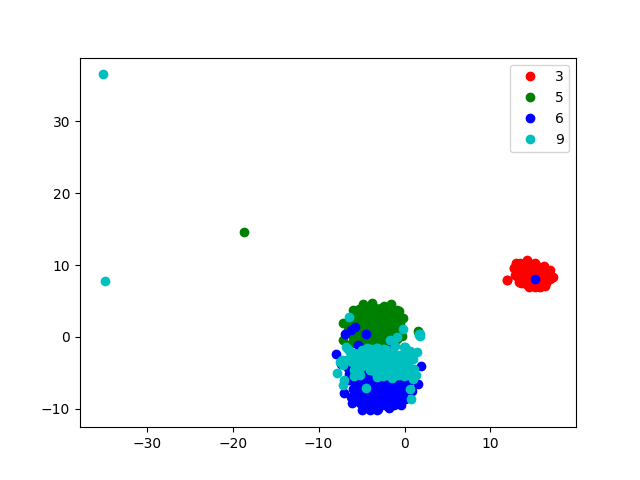

In [80]:
cells_embedded = TSNE(n_components=2, perplexity=60.0, metric="correlation", random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

(2, 600)


<IPython.core.display.Javascript object>


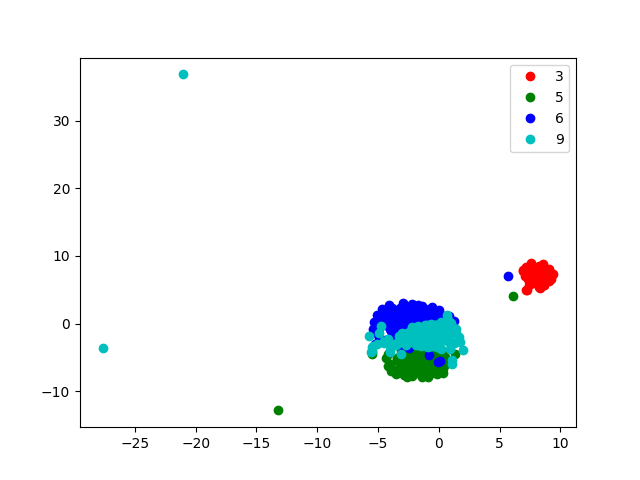

In [84]:
cells_embedded = TSNE(n_components=2, perplexity=90.0, metric="correlation", random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

(2, 600)


<IPython.core.display.Javascript object>


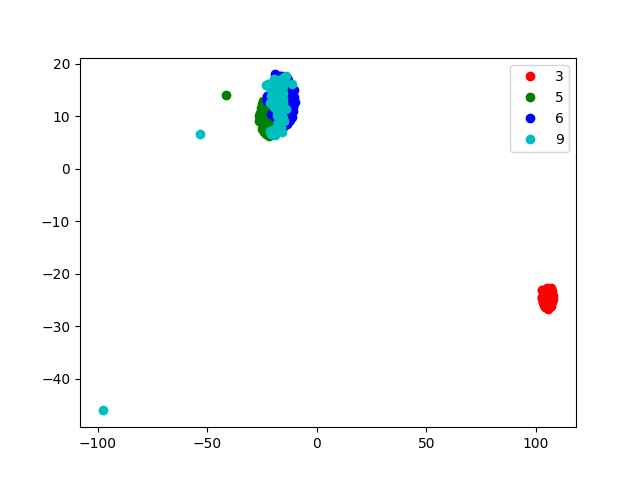

In [83]:
cells_embedded = TSNE(n_components=2, perplexity=60.0, learning_rate=100.0, n_iter=2000, init='pca', metric="correlation", random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

(2, 600)


<IPython.core.display.Javascript object>


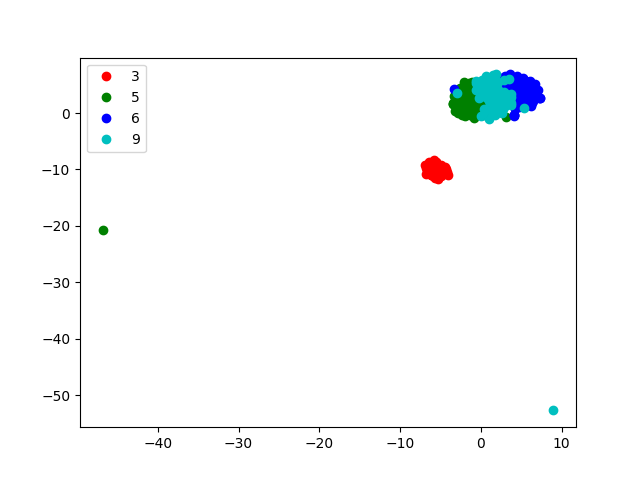

In [9]:
cells_embedded = TSNE(n_components=2, perplexity=90.0, metric="correlation", random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

(2, 600)


<IPython.core.display.Javascript object>


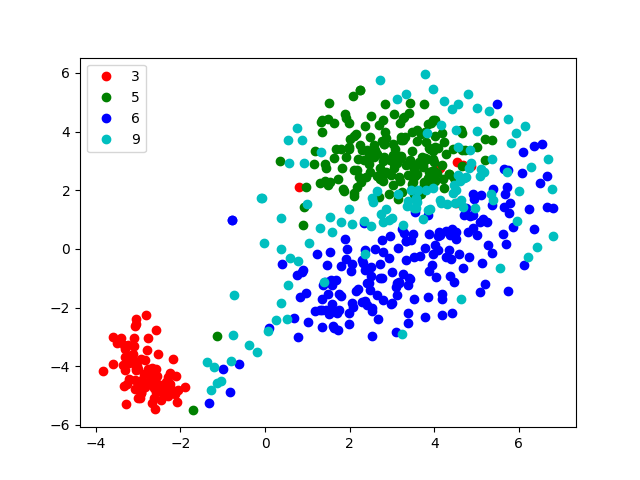

In [12]:
cells_embedded = TSNE(n_components=2, perplexity=90.0, random_state=21).fit_transform(TNSE_cells).T.tolist()
print(np.array(cells_embedded).shape)

TSNE_plot(cells_embedded, TSNE_clusters)

In [12]:
TSNE_path = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\temporal garbage\TSNE_smartseq\tsne_scaled.pkl'
tsne_results = pickle.load(open(TSNE_path, 'rb'))
cells_filtered_path = r'D:\Technion studies\Keren Laboratory\python_playground\outputs\temporal garbage\TSNE_smartseq\cells_filtered.pkl'
cells_filtered, clusters = pickle.load(open(cells_filtered_path, 'rb'))


In [27]:
x = 54

nor_factor = mx -mi
((x - mi)/nor_factor) * 150

149.57833088287245

75.0

<IPython.core.display.Javascript object>


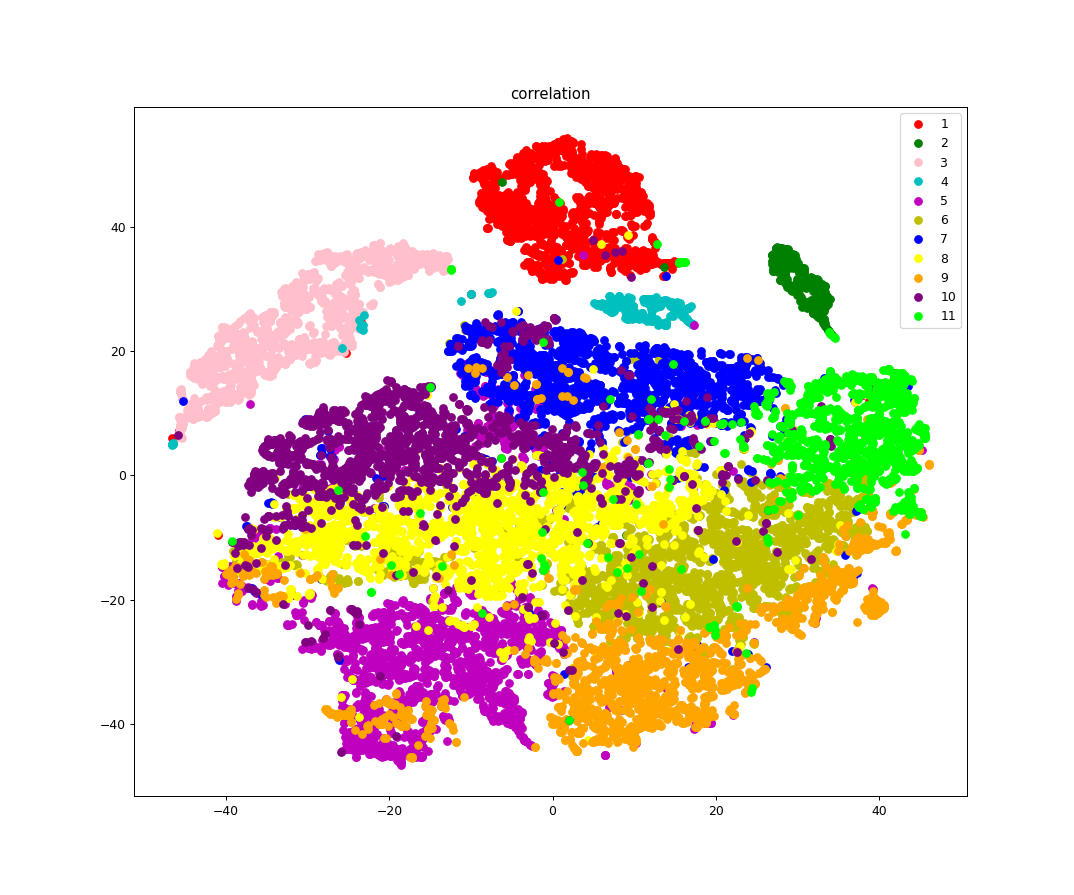

In [52]:
def visualize(cells, clusters_labels, title=None, centroids=None):
    """
    Visualize 2D representation.
    :param cells: embedded cells
    :param clusters_labels: list in number of cells length indicates each cell its cluster.
    :param title: plot title
    :param centroids: of the cluster algorithm
    :return:
    """
    X = cells[0]
    Y = cells[1]

    # plt.plot(X, Y, 'ro')
    plt.figure(figsize=(12,10))
    colors = ['r', 'g', 'pink', 'c', 'm', 'y', 'b', 'yellow', 'orange', 'purple',  'lime', 'lavender', 'darkred', 'olive', 'k', 'w']
    for cluster, c in zip(np.unique(clusters_labels), colors):
        Xi = [X[i] for i in range(len(clusters_labels)) if clusters_labels[i] == cluster]
        Yi = [Y[i] for i in range(len(clusters_labels)) if clusters_labels[i] == cluster]
        plt.plot(Xi, Yi, 'ro', color=c, label=cluster)
    # if centroids:
    #     for centroid in centroids:
    #         plt.plot(centroid[0], centroid[1], 'ro', color='y')
    # plt.plot([1, 2], [1, 4], 'ro')
    # plt.plot([3, 4], [9, 16], 'ro', color='green')
    plt.title(title)
    
    plt.legend()
    plt.show()
    
# plan_size = 700
# mx = tsne_results.flatten().max()
# mi = tsne_results.flatten().min()
# tsne_vis = ((tsne_results.T - mi)/nor_factor) * plan_size - (plan_size/2)
tsne_vis = tsne_results.T
visualize(tsne_vis, clusters, 'correlation')